In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 2: Problem Formulation

"We consider the special case where r is constant. (What if r is not constant?)
The problem is then to compute
$$
\frac{V_{t_0}(S_{t_0})}{B_{t_0}} = \max_{\tau}(\mathbb{E}\frac{h(S_\tau)}{B_\tau})."
$$

In [58]:
from DiscretizationSchemes import discretizationScheme # consider different discretization schemes?
from intrinsicOptionValues import call, put # consider more payoffs?


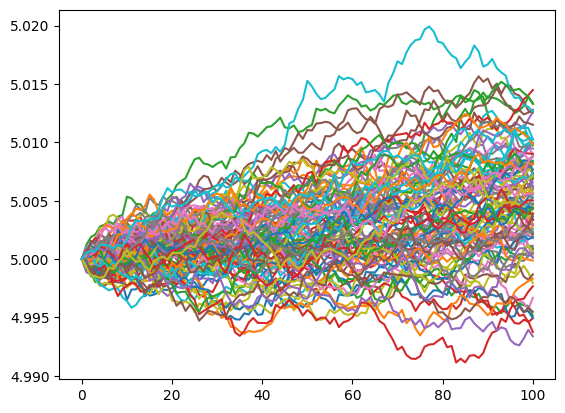

In [59]:
# check discretizationscheme
mu = 0.001
sigma = 0.01
start_price = 5
times = np.linspace(0,1,101) # monitoring dates
N = 100
for i in range(N):
    plt.plot(discretizationScheme(times, start_price, mu, sigma))

### Lokeshwar, p4: Optimization problem (1)

In [67]:
from scipy import optimize

In [60]:
# compute for a call with strike K=6
K = 5
def h(S_T):
    return call(S_T,K)

# "Generate Stm (n) for paths n = 1,...,N, m = 0,...,M"
S0, mu, sigma = 5, 0.001, 0.01
T=1
M = 52
monitoring_dates = np.linspace(0,T,M) # does not have to be evenly spaced
N = 100
sampleS = []
for i in range(N):
    sampleS.append(discretizationScheme(monitoring_dates, S0, mu, sigma))

# "Evaluate final time option value for each path."
sampleV = []
for i in range(N):
    S_T = sampleS[i][-1]
    sampleV.append(max(h(S_T),0))

# Initialize βtM from uniform distribution.
d = 1 # in this case the Markovian process is a single stock price
p = 10 # number of neurons, see Hornik et al for a reasonable value
Np = p*d + p + p + 1
betas = np.zeros((M,Np))
betas[M-1] = np.random.uniform(0,1,Np) # ReLU only learns from positive values

def G(beta,S_t):
    A1S_T = S_t * beta[:p] + beta[p:p+p]
    phiA1S_T = np.maximum(A1S_T, np.zeros_like(A1S_T))
    A2phiA1S_T = np.dot(beta[p+p:p+p+p],phiA1S_T) + beta[p+p+p]
    psiA2phiA1S_T = A2phiA1S_T
    return psiA2phiA1S_T

def target(beta, S_t, V_t):
    (1/N) * sum([(V_t[n] - G(beta, S_t)[n])**2] for n in range(N))

# Regress later
for i in range(M-1, -1, -1):
  optimize.minimize(target, betas[i], sampleS[:][i]) # specify method?



In [66]:
beta = np.zeros(5)
beta[0:2]
beta[2:4]

array([0., 0.])

In [61]:
holdValues = np.zeros(len(times)-1)
